У цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подальших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну в індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

## Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import category_encoders as ce
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

pd.set_option('display.max_columns', 100)

## Знайомство з даними

## **Завдання 1.**
Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars = pd.read_csv('./data/cars.csv')
cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


## **Завдання 2.**
Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мультикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
# ? pd.DataFrame.info

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
cars.select_dtypes(include='object').nunique()

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

In [6]:
for col in cars.select_dtypes(include='object').columns:
    print(col, cars[col].unique()[:5])

Brand ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai']
Model ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata']
Fuel_Type ['Petrol' 'Diesel']
Transmission ['Manual' 'Automatic']
Owner_Type ['First' 'Second' 'Third']


There are 8 numerical columns and 5 categorical columns in the dataset:
- 2 binary columns with only two unique values (`Fuel_Type` and `Transmission`)
- 2 multicategorical columns (more than 2 unique values) with values, that don't have inherent order
- 1 column with ordinal features (`Owner_Type` with unique values `First` > `Second` > `Third`)

## **Завдання 3**.

Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
inputs, target = cars.drop(columns=['Price', 'Car_ID']), cars['Price']
X_train, X_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=12)

In [8]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (80, 11), y_train: (80,)
X_test: (20, 11), y_test: (20,)


Save the numeric column names for future work.

In [9]:
num_cols = X_train.select_dtypes(include='number').columns.to_list()
num_cols

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

## **Завдання 4**.
Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

### 4.1.1 Encoding the `Fuel_Type` column

In [10]:
inputs.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

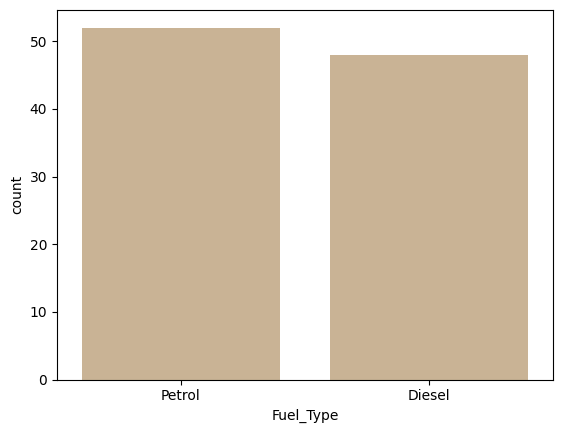

In [11]:
sns.countplot(data=inputs, x='Fuel_Type', color='tan')
plt.show()

In [12]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['is_petrol'] = X_train.Fuel_Type.map(fuel_type_codes)
X_train['is_petrol'].value_counts()

is_petrol
1    41
0    39
Name: count, dtype: int64

In [13]:
X_test['is_petrol'] = X_test.Fuel_Type.map(fuel_type_codes)

In [14]:
del X_train['Fuel_Type']
del X_test['Fuel_Type']

### 4.1.2 Encoding the `Transmission` column

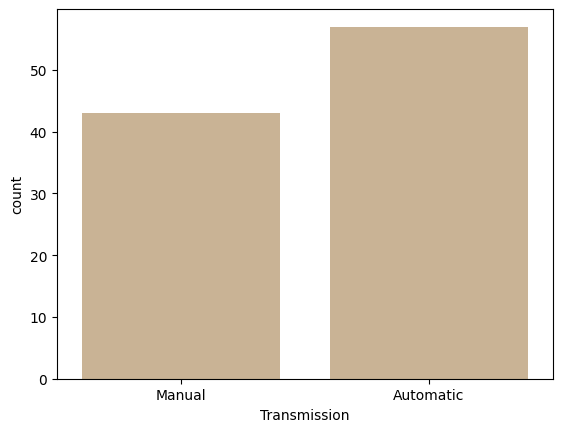

In [15]:
sns.countplot(data=inputs, x='Transmission', color='tan')
plt.show()

In [16]:
transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['is_automatic'] = X_train.Transmission.map(transmission_codes)
X_train['is_automatic'].value_counts()

is_automatic
1    49
0    31
Name: count, dtype: int64

In [17]:
X_test['is_automatic'] = X_test.Transmission.map(transmission_codes)

In [18]:
del X_train['Transmission']
del X_test['Transmission']

### 4.2. `OneHotEncoder` for the `Brand` column

з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

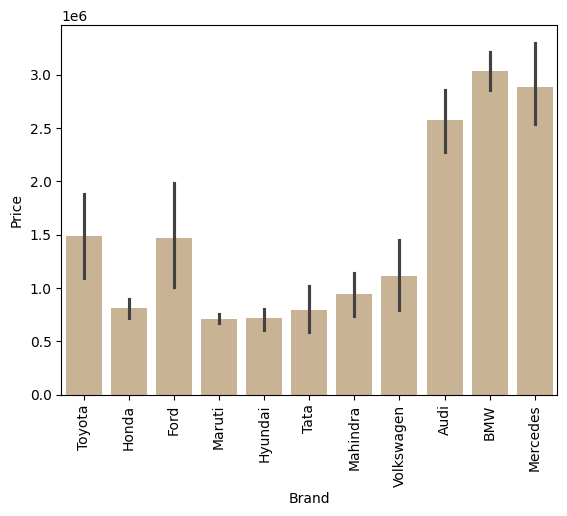

In [19]:
sns.barplot(x=inputs.Brand, y=target, color='tan')
plt.xticks(rotation=90)
plt.show()

In [20]:
enc = OneHotEncoder(dtype='int').fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [21]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_test = enc.transform(X_test[['Brand']]).toarray()

In [22]:
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test

In [23]:
X_train.head()

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,is_petrol,is_automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,Volkswagen,T-Roc,2019,22000,Second,18,1498,148,5,1,1,0,0,0,0,0,0,0,0,0,0,1
55,Audi,A5,2018,28000,First,17,1968,187,5,0,1,1,0,0,0,0,0,0,0,0,0,0
26,Audi,A6,2018,28000,First,15,1984,241,5,1,1,1,0,0,0,0,0,0,0,0,0,0
54,Volkswagen,Vento,2017,32000,Second,18,1598,103,5,1,0,0,0,0,0,0,0,0,0,0,0,1
19,Mercedes,GLC,2017,26000,Second,12,1991,241,5,1,1,0,0,0,0,0,0,0,1,0,0,0


In [24]:
del X_train['Brand']
del X_test['Brand']

### 4.3. `OrdinalEncoder` for `Owner_Type` column

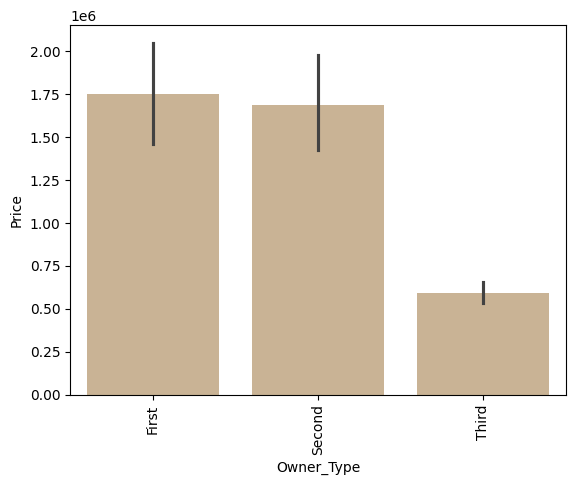

In [25]:
sns.barplot(x=inputs.Owner_Type, y=target, color='tan')
plt.xticks(rotation=90)
plt.show()

In [26]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']], dtype='int')
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [27]:
X_train['Owner_Type_Codes'].value_counts()

Owner_Type_Codes
1    36
0    36
2     8
Name: count, dtype: int64

For the `Owner_Type` column, we use `OrdinalEncoder`, which is the categorical feature that exhibits a clear and meaningful order `First` > `Second` > `Third`.

Ordinal encoding will assign integer values as follows:
- `First` → 0
- `Second` → 1
- `Third` → 2

The result after encoding:

In [28]:
display(X_train.head()), display(X_test.head())

,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,is_petrol,is_automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,T-Roc,2019,22000,Second,18,1498,148,5,1,1,0,0,0,0,0,0,0,0,0,0,1,1
55,A5,2018,28000,First,17,1968,187,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0
26,A6,2018,28000,First,15,1984,241,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0
54,Vento,2017,32000,Second,18,1598,103,5,1,0,0,0,0,0,0,0,0,0,0,0,1,1
19,GLC,2017,26000,Second,12,1991,241,5,1,1,0,0,0,0,0,0,0,1,0,0,0,1


,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,is_petrol,is_automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Q3,2016,38000,Second,15,1395,148,5,1,1,1,0,0,0,0,0,0,0,0,0,0,1
41,Santro,2019,26000,Third,20,1086,68,5,1,0,0,0,0,0,1,0,0,0,0,0,0,2
92,Vento,2017,32000,Second,18,1598,103,5,1,0,0,0,0,0,0,0,0,0,0,0,1,1
14,Ertiga,2020,18000,First,19,1462,103,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0
68,Aspire,2019,26000,Third,20,1194,94,5,1,0,0,0,1,0,0,0,0,0,0,0,0,2


(None, None)

In [29]:
del X_train['Owner_Type']
del X_test['Owner_Type']

### 4.4 Encoding the `Model` column

Колонка `Model` містить забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [30]:
inputs.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [31]:
inputs.Model.nunique()

58

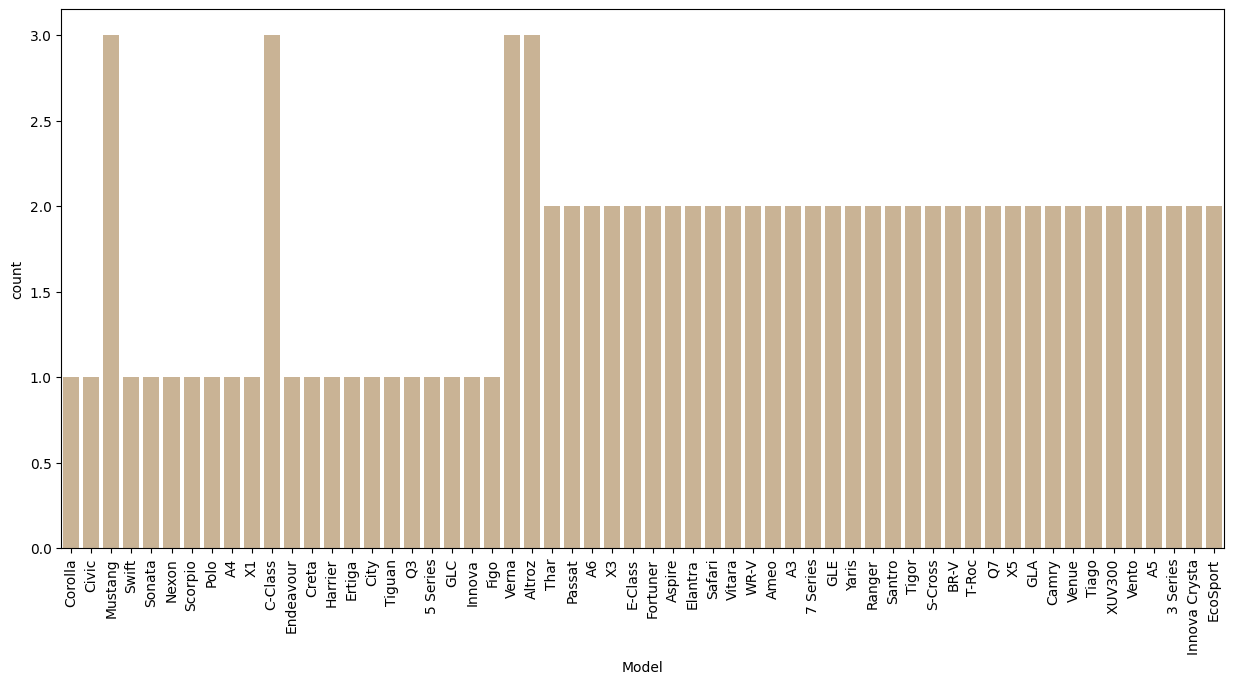

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(data=inputs, x='Model', color='tan')
plt.xticks(rotation=90)
plt.show()

There are a lot of different categories, but most categories appear only 1 or 2 times, and only 4 categories appear 3 times. That's why the direct usage of target encoding may be the cause of data leakage.

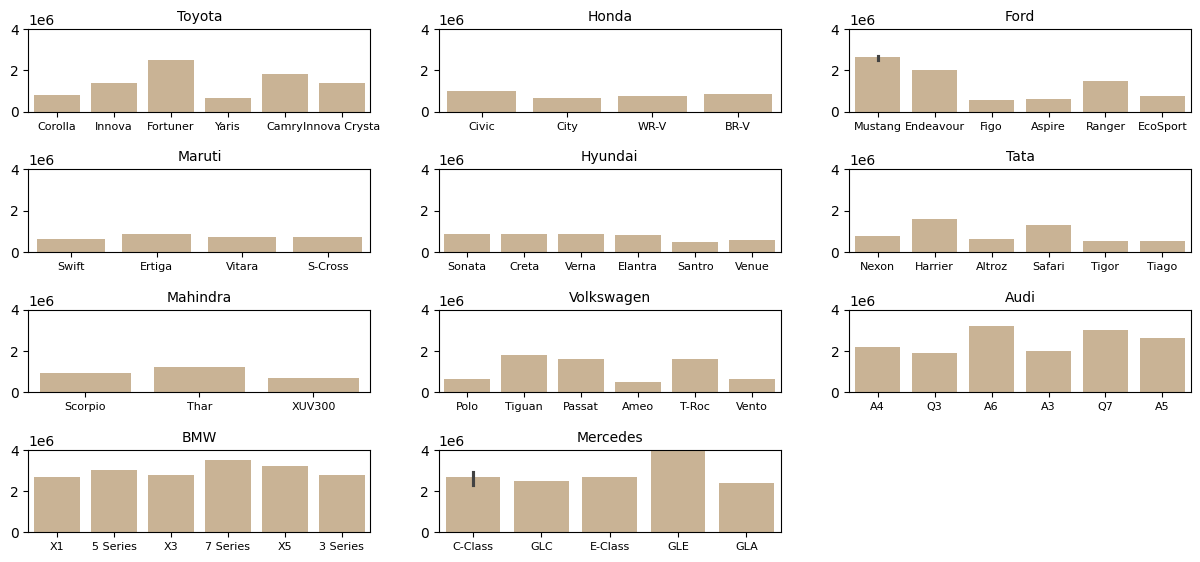

In [33]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.7, wspace=0.2)
y_lim_top = max(target)

for n, col in enumerate(inputs.Brand.unique()):
    ax = plt.subplot(7, 3, n+1)
    ax.set_title(col, fontsize=10)
    sns.barplot(x=inputs[inputs.Brand == col].Model,
                y=target,
                ax=ax,
                color='tan')
    ax.set_xlabel('')
    ax.set_ylim(top=y_lim_top)
    ax.set_ylabel('')
    plt.xticks(fontsize=8)
plt.show()

In [34]:
model_df = (cars
            .groupby(by=['Brand', 'Model'])['Price']
            .mean()
            .sort_values()
            .reset_index())

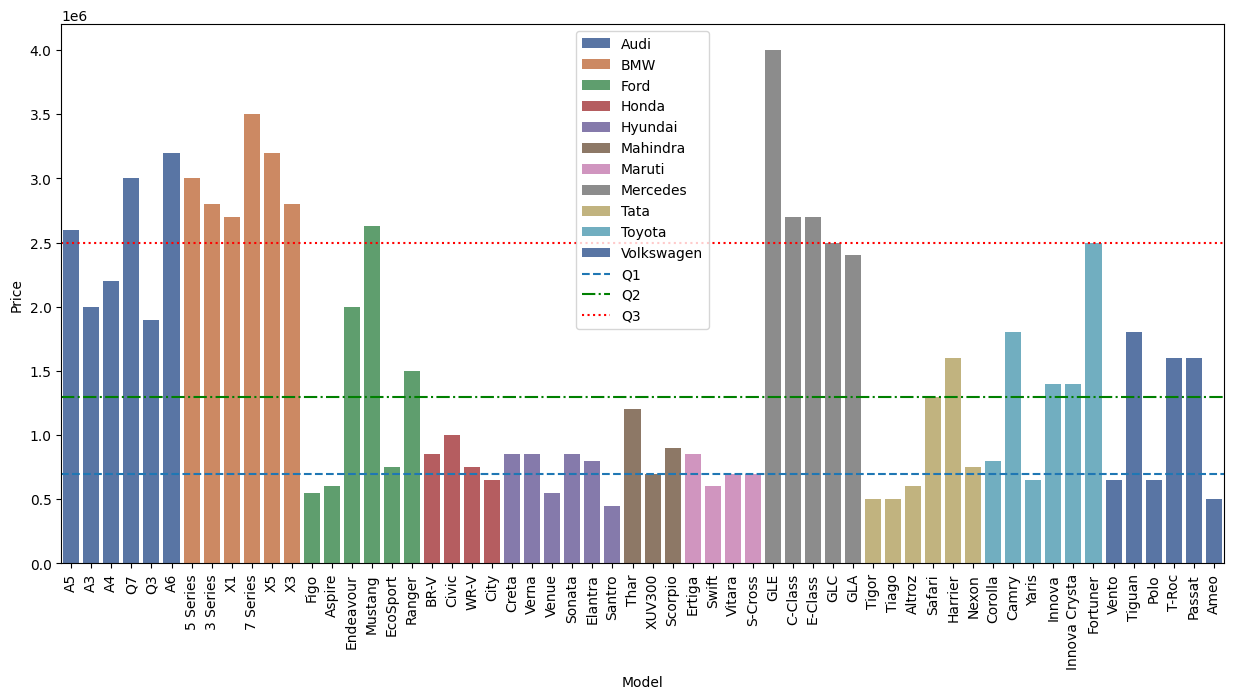

In [35]:
plt.figure(figsize=(15, 7))
sns.barplot(data=model_df.sort_values(by='Brand'),
            x='Model',
            y='Price',
            hue='Brand',
            palette='deep'
            )
plt.axhline(y=target.quantile(0.25), linestyle='--', label='Q1')
plt.axhline(y=target.quantile(0.5), linestyle='-.', color='g', label='Q2')
plt.axhline(y=target.quantile(0.75), linestyle=':', color='r', label='Q3')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [36]:
fig = px.histogram(model_df, y='Price', x='Model', marginal='box')
fig.show()

It look like the car's price dependents more on the brand, but for some brands, it also varies depending on the model. 

Let's try using target encoding in another way: grouping car models by quartiles of price.

For these experiments, create copies of the train and test datasets.

In [37]:
X_train_enc = X_train.copy(deep=True)
X_test_enc = X_test.copy(deep=True)

In [38]:
train_model_cat = (cars
                   .loc[X_train_enc.index, ['Model', 'Price']]
                   .groupby('Model')
                   .mean()
                   .reset_index())

train_model_cat['model_cat'] = (pd.qcut(train_model_cat.Price, 4, labels=[0, 1, 2, 3])
                                .astype('int'))
train_model_cat

,Model,Price,model_cat
0,3 Series,2.800000e+06,3
1,5 Series,3.000000e+06,3
2,7 Series,3.500000e+06,3
3,A3,2.000000e+06,2
4,A5,2.600000e+06,3
5,A6,3.200000e+06,3
6,Altroz,6.000000e+05,0
7,Ameo,5.000000e+05,0
8,Aspire,6.000000e+05,0
9,BR-V,8.500000e+05,1


Because there are new models in the test dataset that do not appear in the train dataset, fill unknown models with `-1`. We need to handle missing values because linear regression requires complete data.  

In [39]:
train_model_target_enc = (X_train_enc[['Model']]
                          .merge(train_model_cat[['Model', 'model_cat']],
                                 on='Model')
                          .set_index(X_train_enc.index)[['model_cat']])

test_model_target_enc = (X_test_enc[['Model']]
                         .merge(train_model_cat[['Model', 'model_cat']],
                                on='Model',
                                how='left')
                         .set_index(X_test_enc.index)
                         .fillna(-1)[['model_cat']])

Because of in this case we dealing with high-cardinality categorical feature `Model` (58 unique categories) and we want to reduce the dimensionality compared to one-hot encoding, so let's try Binary encoding.

In [40]:
binary_enc = ce.BinaryEncoder(cols=['Model'])

with warnings.catch_warnings(action="ignore"):
    train_model_binary_enc = binary_enc.fit_transform(X_train_enc.Model)
    test_model_binary_enc = binary_enc.transform(X_test_enc.Model)


Another opportunity is to use Feature Hashing, which maps each category to a fixed number of numerical columns

In [41]:
hashing_enc = ce.HashingEncoder(cols=['Model'], n_components=5)

with warnings.catch_warnings(action="ignore"):
    train_model_hashing_enc = hashing_enc.fit_transform(X_train_enc.Model)
    test_model_hashing_enc = hashing_enc.transform(X_test_enc.Model)


In [42]:
X_train.drop(columns=['Model'], inplace=True, errors='ignore')
X_test.drop(columns=['Model'], inplace=True, errors='ignore')
X_train_enc.drop(columns=['Model'], inplace=True, errors='ignore')
X_test_enc.drop(columns=['Model'], inplace=True, errors='ignore')

## **Завдання 5.**
Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [43]:
train_enc = pd.concat([X_train.select_dtypes(include='number'), y_train], axis=1)
train_enc.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,is_petrol,is_automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,2019,22000,18,1498,148,5,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1600000
55,2018,28000,17,1968,187,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2600000
26,2018,28000,15,1984,241,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3200000
54,2017,32000,18,1598,103,5,1,0,0,0,0,0,0,0,0,0,0,0,1,1,650000
19,2017,26000,12,1991,241,5,1,1,0,0,0,0,0,0,0,1,0,0,0,1,2500000


In [44]:
corr_df = train_enc.corr()

In [45]:
corr_df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,is_petrol,is_automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137


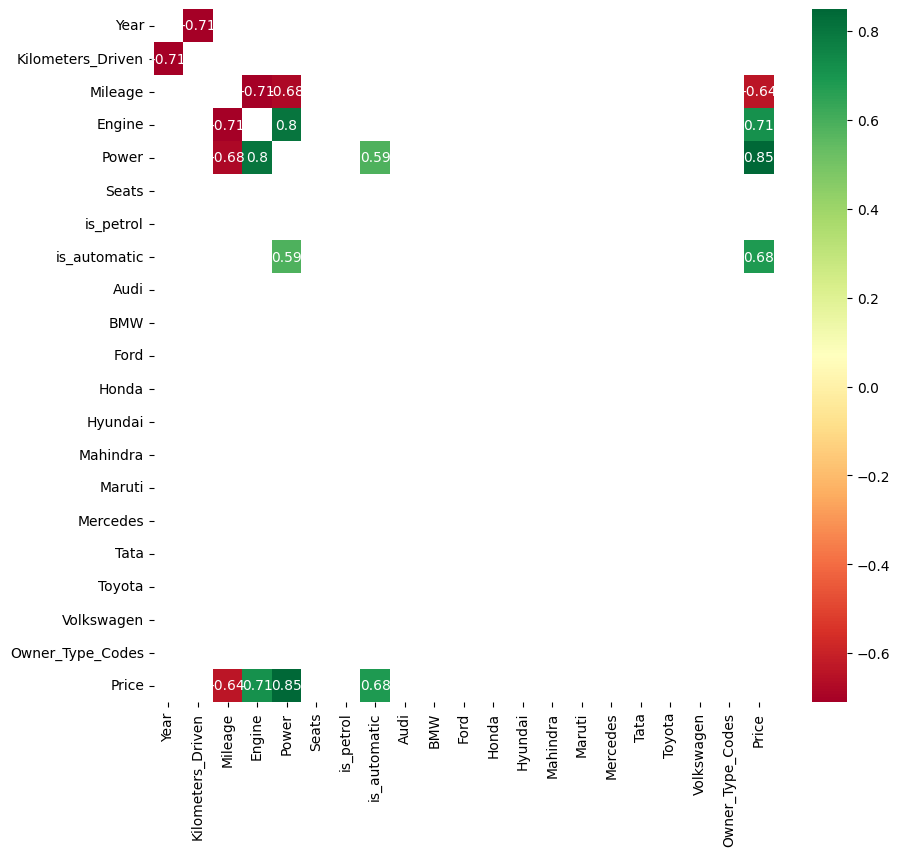

In [46]:
plt.figure(figsize=(10, 9))

sns.heatmap(data=corr_df[(np.abs(corr_df) > 0.5) & (np.abs(corr_df) < 0.999)],
            annot=True,
            cmap='RdYlGn',
            cbar=True)
plt.show()

In [47]:
(corr_df[(np.abs(corr_df) > 0.5) & (np.abs(corr_df) < 0.999)]
 ['Price']
 .sort_values(ascending=False).head(10))

Power                0.849137
Engine               0.710561
is_automatic         0.680731
Mileage             -0.638404
Year                      NaN
Kilometers_Driven         NaN
Seats                     NaN
is_petrol                 NaN
Audi                      NaN
BMW                       NaN
Name: Price, dtype: float64

- The target variable `Price` exhibits an absolute correlation value higher than 0.5 with the following columns:
    - `Power` (0.849137)
    - `Engine` (0.710561)
    - `is_automatic` (0.680731)
    - `Mileage` (-0.638404)

- `Price` has a strong positive correlation with `Power`, `Engine`, and `is_automatic`. This indicates that as a car's power or engine capacity increases, or if the car has an automatic transmission, its price tends to increase as well.
- Conversely, `Mileage` shows a relatively strong negative correlation with `Price`. This suggests that as a car's mileage increases, its price decreases.

## **Завдання 6**.
Тренуємо лінійну регресію.

0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [48]:
X_train.dtypes

Year                 int64
Kilometers_Driven    int64
Mileage              int64
Engine               int64
Power                int64
Seats                int64
is_petrol            int64
is_automatic         int64
Audi                 int64
BMW                  int64
Ford                 int64
Honda                int64
Hyundai              int64
Mahindra             int64
Maruti               int64
Mercedes             int64
Tata                 int64
Toyota               int64
Volkswagen           int64
Owner_Type_Codes     int64
dtype: object

In [49]:
model = LinearRegression().fit(X_train, y_train)

y_predict = model.predict(X_test)

loss = root_mean_squared_error(y_test, y_predict)
print(f"Loss (RMSE): {loss}")

Loss (RMSE): 259601.2654272341


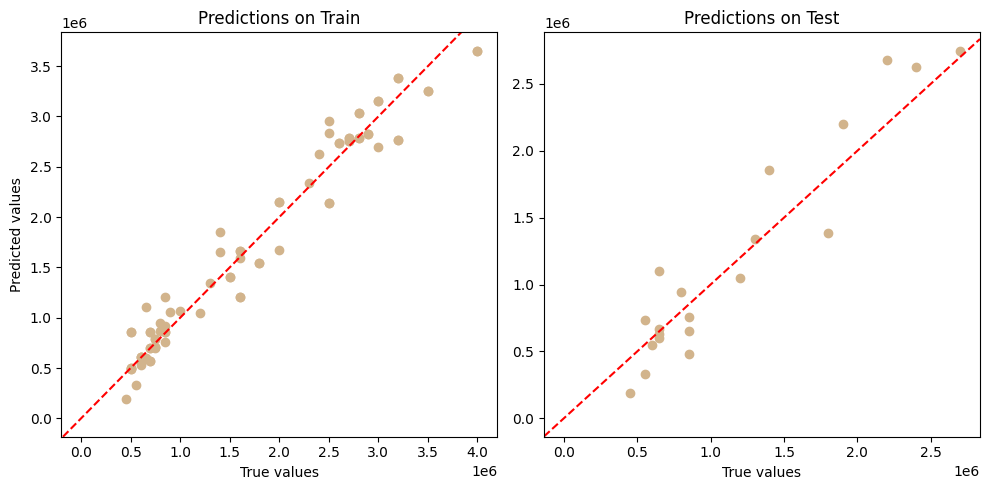

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(y_train, model.predict(X_train), color='tan')
ax1.axline( (0,0), slope=1, linestyle='--', color='r')
ax1.set_title('Predictions on Train')
ax1.set_xlabel('True values')
ax1.set_ylabel('Predicted values')

ax2.scatter(y_test, y_predict, color='tan')
ax2.axline( (0,0), slope=1, linestyle='--', color='r')
ax2.set_title('Predictions on Test')
ax2.set_xlabel('True values')

fig.tight_layout()
plt.show()


In [51]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(y_train.describe())

count        80
mean    1680000
std     1040405
min      450000
25%      700000
50%     1500000
75%     2700000
max     4000000
Name: Price, dtype: float64

In [52]:
predict_df = (pd.DataFrame({
    'y_test': y_test,
    'y_predict': y_predict,
    'errors': (y_predict - y_test)
}).sort_values(by='y_test').reset_index(drop=True))
predict_df.round()

,y_test,y_predict,errors
0,450000,190972.0,-259028.0
1,550000,327737.0,-222263.0
2,550000,733116.0,183116.0
3,600000,546518.0,-53482.0
4,650000,633463.0,-16537.0
5,650000,671291.0,21291.0
6,650000,1104496.0,454496.0
7,650000,599429.0,-50571.0
8,800000,947318.0,147318.0
9,850000,480639.0,-369361.0


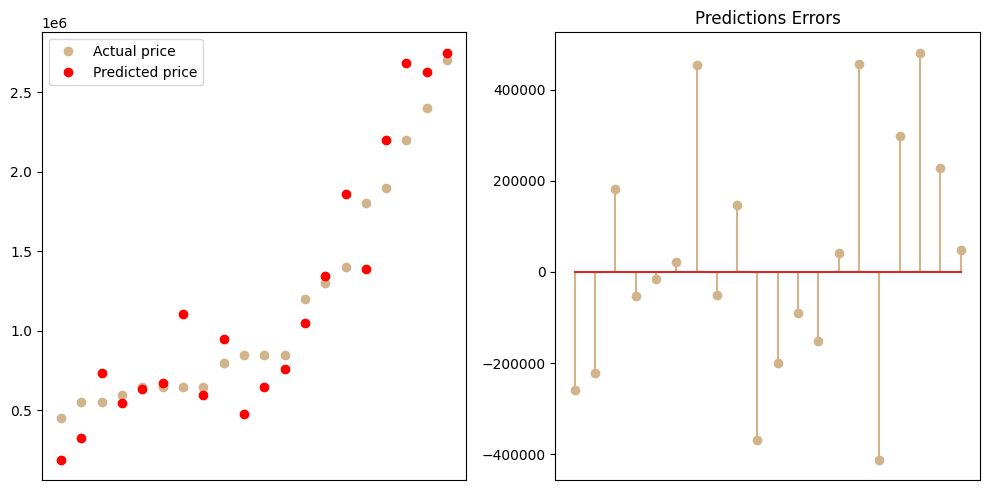

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(predict_df.y_test, 'o', color='tan', label='Actual price')
ax1.plot(predict_df.y_predict, 'o', color='r', label='Predicted price')
ax1.legend()
ax1.set_xticks([])

ax2.stem(predict_df.errors, linefmt='tan')
ax2.set_title('Predictions Errors')
ax2.set_xticks([])

fig.tight_layout()
plt.show()

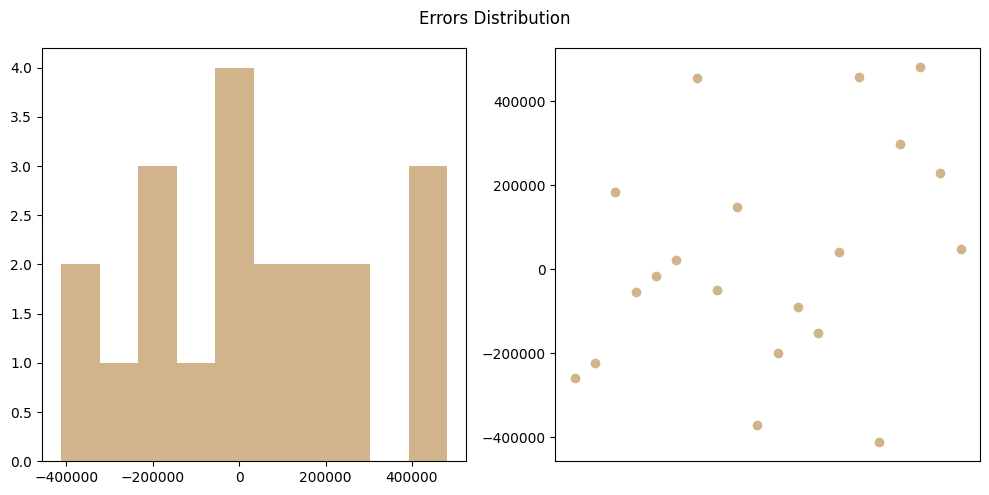

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Errors Distribution')
ax1.hist(predict_df.errors, color='tan')

ax2.plot(predict_df.errors, 'o', color='tan')
ax2.set_xticks([])
fig.tight_layout()
plt.show()

- The model performance is reasonable, as the loss value is approximately a quarter (one-fourth) of the standard deviation.
- The errors do not show dependence on the magnitude of the price, indicating consistent performance across the range of price values.
- The model makes errors in overestimating and underestimating the price, suggesting a balanced distribution of prediction errors.

Let's doing the same for data with different approaches to encoding `Model` column

In [55]:
def try_model_enc_rmse(X_train_enc, X_test_enc, train_enc_model, test_enc_model):
    X_train_enc = pd.concat([X_train_enc, train_enc_model], axis=1)
    X_test_enc = pd.concat([X_test_enc, test_enc_model], axis=1)

    model_enc = LinearRegression().fit(X_train_enc, y_train)
    y_predict_enc = model_enc.predict(X_test_enc)

    loss_enc = root_mean_squared_error(y_test, y_predict_enc)
    return loss_enc

In [56]:
enc_ = {'Target Encoding': [train_model_target_enc, test_model_target_enc],
        'Binary Encoding': [train_model_binary_enc, test_model_binary_enc],
        'Hashing Encoding': [train_model_hashing_enc, test_model_hashing_enc]}

for enc_name, (train_enc_model, test_enc_model) in enc_.items():
    loss = try_model_enc_rmse(X_train_enc, X_test_enc, train_enc_model, test_enc_model)
    print(f"Loss (RMSE) for {enc_name}: {loss}")

Loss (RMSE) for Target Encoding: 482892.3492612963
Loss (RMSE) for Binary Encoding: 234075.38623768237
Loss (RMSE) for Hashing Encoding: 272152.33834187797


The model with Binary encoding the `Model` column provides better results, as it achieves lower value for loss metrics such as `RMSE`. This suggests that encoding the `Model` column captures significant information that improves the model's predictive performance.

## **Завдання 7**.
Ми хочемо проаналізувати як впливає кожен чинник на цільову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

Use only initial numerical columns for StandardScaler and stay encoded columns as is. 

In [57]:
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'is_petrol', 'is_automatic', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai',
       'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen',
       'Owner_Type_Codes'],
      dtype='object')

In [58]:
num_cols

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

In [59]:
cat_cols = list(set(X_train.columns) - set(num_cols))
cat_cols

['Tata',
 'Hyundai',
 'Maruti',
 'BMW',
 'Volkswagen',
 'is_automatic',
 'Mahindra',
 'Toyota',
 'Honda',
 'Mercedes',
 'is_petrol',
 'Audi',
 'Owner_Type_Codes',
 'Ford']

In [60]:
scaler = StandardScaler().set_output(transform='pandas').fit(X_train[num_cols])
scaled_num_train = scaler.transform(X_train[num_cols])
scaled_num_test = scaler.transform(X_test[num_cols])

Concatenate scaled numerical columns with categorical columns.

In [61]:
X_train_scaled = pd.concat((scaled_num_train, X_train[cat_cols]), axis=1)
X_test_scaled = pd.concat((scaled_num_test, X_test[cat_cols]), axis=1)

In [62]:
def train_linear_model_with_rmse(X_train, y_train, X_test, y_test):
    model = LinearRegression().fit(X_train, y_train)
    y_predict = model.predict(X_test)
    loss = root_mean_squared_error(y_test, y_predict)
    print(f'Loss RMSE: {loss}')
    return model

In [63]:
train_linear_model_with_rmse(X_train_scaled, y_train, X_test_scaled, y_test)

Loss RMSE: 259601.2654272342


LinearRegression()

In [64]:
weights_df = pd.DataFrame({'feature': np.append(X_train_scaled.columns, 'const'),
                           'weight': np.append(model.coef_, model.intercept_)})

In [65]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(weights_df.sort_values('weight', ascending=False))

,feature,weight
20,const,22529792
8,Maruti,758803
15,Mercedes,733975
9,BMW,730327
7,Hyundai,236368
17,Audi,130458
19,Ford,66278
4,Power,6141
1,Kilometers_Driven,-11
3,Engine,-38


Feature Importance Analysis Based on Model Weights:
- The most important columns, based on model's weights, are `const`, `Mercedes`, `Toyota`, `Mahindra`, `Ford`, `Tata`, and `Honda` (representing car brands). This aligns with the expectation that the the car's brand significantly impacts price determination.
- Brands such as `Mercedes`, `Maruti`, and `Hyundai` are associated with an increase in car prices, while `Mahindra`, `Ford`, `Tata`, and `Honda` tend to lower the price.
- The presence of an automatic transmission (`is_automatic` column) and the `is_petrol` fuel type tend to increase car prices.

## **Завдання 8.**
На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат. значущими на рівні значущості 0.05? Напишіть їх список.

In [66]:
X_train_scaled_const = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_scaled_const)
results = model_sm.fit()

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           2.34e-34
Time:                        10:29:33   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.471e+06   7.09e+0

In [68]:
results.pvalues[results.pvalues < 0.05]

const           4.527937e-29
Mileage         2.613313e-02
Power           3.439085e-09
Hyundai         1.135831e-03
Maruti          2.827471e-02
BMW             9.640821e-12
is_automatic    8.990654e-03
Mahindra        1.123548e-03
Toyota          1.945814e-02
Mercedes        5.400425e-12
is_petrol       1.024429e-04
Audi            4.920043e-12
dtype: float64

-  `R-squared = 0.959` (`Adj. R-squared = 0.946`) - the model explains approximately 95% of the variation in the dependent variable.
- The values `F-statistic = 73.14` and `p-value = 2.34e-34` mean that the model is significant and the independent variables significantly improve the explanation of the dependent variable.
- Features that are statistically significant at the 0.05 significance level: `const`, `Mileage`, `Power`, `Mahindra`, `Maruti`, `Mercedes`, `is_petrol`, `Toyota`, `BMW`, `is_automatic`, `Audi`, `Hyundai`.


## **Завдання 9**.
Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявились стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [69]:
significant_05_features = results.pvalues[results.pvalues < 0.05].index.to_list()
X_train_scaled_const[significant_05_features]

model_sm_05 = sm.OLS(y_train, X_train_scaled_const[significant_05_features])
results_05 = model_sm_05.fit()
print(results_05.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           4.53e-41
Time:                        10:29:33   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.348e+06   6.68e+04     20.180   

- The new values `R-squared = 0.954` (vs `0.959` earlier) and `Adj. R-squared = 0.947` (vs `0.946` earlier) show minimal differences from the initial model.
- The feature `Maruti` is not statistically significant at the 0.05 level in the updated model.


## **Завдання 10**.
Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [70]:
results.pvalues[results.pvalues < 0.25]

const                4.527937e-29
Kilometers_Driven    8.154400e-02
Mileage              2.613313e-02
Power                3.439085e-09
Hyundai              1.135831e-03
Maruti               2.827471e-02
BMW                  9.640821e-12
Volkswagen           2.475896e-01
is_automatic         8.990654e-03
Mahindra             1.123548e-03
Toyota               1.945814e-02
Mercedes             5.400425e-12
is_petrol            1.024429e-04
Audi                 4.920043e-12
Ford                 1.127464e-01
dtype: float64

In [71]:
significant_25_features = results.pvalues[results.pvalues < 0.25].index.to_list()

model_sm_25 = sm.OLS(y_train, X_train_scaled_const[significant_25_features])
results_25 = model_sm_25.fit()
print(results_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           4.79e-39
Time:                        10:29:33   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      65   BIC:                             2255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.414e+06   8.88e+0

- The new values `R-squared = 0.958` and `Adj. R-squared = 0.949` are comparable to the initial model with all features.
- The final model can be chosen for use, as its `R-squared` value, although slightly, is less than that of the first model and is still quite high, and the `Adj. R-squared` value is the highest among the three, indicating a better fit with fewer variables.
- Additionally, the lower `AIC` and `BIC` values for the last model reinforce its suitability by suggesting it strikes a better balance between model complexity and performance.


### Additional Analysis with the encoding column `Model`

#### Binary Encoding

Let's analyze the model with Binary Encoding the`Model` column.

In [72]:
X_train_enc_scaled = pd.concat((X_train_scaled, train_model_binary_enc), axis=1)
X_test_enc_scaled = pd.concat((X_test_scaled, test_model_binary_enc), axis=1)

model_enc_scaled = train_linear_model_with_rmse(X_train_enc_scaled,
                                                y_train,
                                                X_test_enc_scaled,
                                                y_test)

weights_df_enc = pd.DataFrame({'feature': np.append(X_train_enc_scaled.columns, 'const'),
                               'weight': np.append(model_enc_scaled.coef_,
                                               model_enc_scaled.intercept_)})

with pd.option_context('display.float_format', '{:.0f}'.format):
    display(weights_df_enc.sort_values('weight', ascending=False))

Loss RMSE: 234075.38623768347


,feature,weight
26,const,1589724
15,Mercedes,808803
17,Audi,802618
9,BMW,697728
4,Power,511358
11,is_automatic,272615
22,Model_2,153064
13,Toyota,136196
5,Seats,93896
18,Owner_Type_Codes,69610


The new features has higher coefficient values, indicating a strong influence on the target variable. This suggest they are meaningful additions and improve the model's predictive effectiveness.

In [73]:
X_train_enc_scaled_const = sm.add_constant(X_train_enc_scaled)
model_enc_sm = sm.OLS(y_train, X_train_enc_scaled_const)
results_enc = model_enc_sm.fit()

print(results_enc.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     59.56
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           7.20e-31
Time:                        10:29:33   Log-Likelihood:                -1087.3
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      54   BIC:                             2289.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.457e+06   1.07e+0

In [74]:
results_enc.pvalues[results_enc.pvalues < 0.05]

const                4.306256e-19
Kilometers_Driven    4.488492e-02
Power                2.061621e-09
Hyundai              1.597245e-03
Maruti               3.126099e-02
BMW                  1.848075e-10
is_automatic         9.866194e-03
Mahindra             2.917890e-04
Toyota               2.019015e-02
Mercedes             1.549349e-11
is_petrol            9.825670e-04
Audi                 3.218746e-11
Model_5              2.611338e-02
dtype: float64

- Only one newly created columns from encoding the `Model` column is statistically significant at the 0.05 level
- The model achieves the highest `R-squared = 0.965` and `Adj. R-squared = 0.949` values, with a lower `RMSE`
- Slightly higher `AIC` and `BIC` suggest increased complexity, but the improvement in accuracy is notable

In [75]:
significant_25_features_enc = results_enc.pvalues[results_enc.pvalues < 0.25].index.to_list()

model_sm_enc_25 = sm.OLS(y_train, X_train_enc_scaled_const[significant_25_features_enc])
results_enc_25 = model_sm_enc_25.fit()
print(results_enc_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     96.37
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           5.64e-38
Time:                        10:29:33   Log-Likelihood:                -1089.0
No. Observations:                  80   AIC:                             2214.
Df Residuals:                      62   BIC:                             2257.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.441e+06   8.95e+0

This model include statistically significant features at the 0.25 significance level from `BinaryEncoding` (`Model_2`, `Model_3`, and `Model_5`). 

Model evaluation:
- `R-squared = 0.964`
- `Adjusted R-squared = 0.954`
- Akaike Information Criterion `AIC = 2214`
- Bayesian Information Criterion `BIC = 2232`
- This is the best-performing model in terms of both explanatory and penalized model complexity (as measured by BIC)

This model is could be recommended for use in production or further validation due to its robust performance and balanced complexity.


#### Hashing Encoding

Let's analyze the model with Hashing Encoding the`Model` column.

In [76]:
X_train_hash_enc_scaled = pd.concat((X_train_scaled, train_model_hashing_enc), axis=1)
X_test_hash_enc_scaled = pd.concat((X_test_scaled, test_model_hashing_enc), axis=1)

X_train_hash_enc_scaled_const = sm.add_constant(X_train_hash_enc_scaled)
model_hash_enc_sm = sm.OLS(y_train, X_train_hash_enc_scaled_const)
results_hash_enc = model_hash_enc_sm.fit()

print(results_hash_enc.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     71.26
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           2.18e-33
Time:                        10:31:16   Log-Likelihood:                -1085.0
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      56   BIC:                             2275.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.261e+06   5.88e+0

In [77]:
results_hash_enc.pvalues[results_hash_enc.pvalues < 0.05]

const                1.070839e-28
Kilometers_Driven    4.407227e-02
Mileage              3.643391e-02
Power                1.001330e-10
Hyundai              1.906932e-03
Maruti               4.124750e-03
BMW                  1.768244e-11
Mahindra             1.209675e-04
Toyota               2.076100e-02
Mercedes             4.347229e-11
is_petrol            6.172246e-06
Audi                 1.268963e-11
Ford                 2.923432e-02
col_0                1.056521e-03
col_1                4.618948e-04
col_2                1.801224e-03
col_3                1.012054e-07
dtype: float64

- This model include statistically significant new features at the 0.25 significance level with high coefficient values, indicating a strong influence on the target variable. 
- The model achieves the highest `R-squared = 0.967` and `Adj. R-squared = 0.953` values.

In [78]:
significant_25_features_hash_enc = results_hash_enc.pvalues[results_hash_enc.pvalues < 0.25].index.to_list()

model_sm_hash_enc_25 = sm.OLS(y_train, X_train_hash_enc_scaled_const[significant_25_features_hash_enc])
results_hash_enc_25 = model_sm_hash_enc_25.fit()
print(results_hash_enc_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     95.33
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           9.13e-38
Time:                        10:37:17   Log-Likelihood:                -1086.6
No. Observations:                  80   AIC:                             2211.
Df Residuals:                      61   BIC:                             2256.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.31e+06   9.14e+0

This model include statistically significant features at the 0.25 significance level from `HashingEncoding` (`col_0`, `col_1`, `col_2`, and `col_3`). 

Model evaluation:
- `R-squared = 0.966`
- `Adjusted R-squared = 0.956`
- Akaike Information Criterion `AIC = 2211`
- Bayesian Information Criterion `BIC = 2256`
- This is the best-performing model on train in terms of both explanatory and penalized model complexity (as measured by BIC)

But also this model has lower `RMSE` on test data, than the model with `BinaryEncoding`.
